In [14]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime
import copy
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import copy
pd.options.mode.chained_assignment = None

In [15]:
df = pd.read_csv("/home/memari/centering_majid/tables/ios_activity_cleaned.csv", parse_dates=['date'])

In [16]:
# find the first day
def find_first_day(device_id, df):
    df_target = df[df['device_id']==device_id]
    return min(df_target['date'])
def halve(df):
    first_day = {device_id:find_first_day(device_id, df) 
                 for device_id in set(df['device_id'].tolist())
                if find_first_day(device_id, df)>=datetime.date(year=2022,month=11,day=11)}
    df = df[df['device_id'].isin(first_day)]
    df['day'] = df.apply(lambda x: 1+(x['date']-first_day[x['device_id']]).days, axis = 1)
    df_1_14 = df[df['day']<=14]
    df_15_28 = df[(df['day']>14) & (df['day']<=28)]
    return df_1_14,df_15_28
df_1_14,df_15_28 = halve(df)

In [17]:
col = df.columns.tolist()
col.insert(0,'day')
print(col)

['day', 'device_id', 'date', 'stationary', 'walking', 'running', 'automotive', 'cycling', 'unknown']


In [18]:
df_1_14 = df_1_14[col]
df_15_28 = df_15_28[col]

In [19]:
df_group = pd.read_csv('/data/meditation/majid/surveys/0.csv',
                       skiprows=[1, 2])[['Study ID', 'Group']]
df_group.columns = ['survey_id', 'group']
df_id = pd.read_csv('/home/memari/centering_majid/tables/id.csv')
df_group = df_id.merge(df_group, on='survey_id', how='left')
df_group.rename(columns={'device_id1': 'device_id'}, inplace=True)

df_plot_1_14 = df_1_14.merge(df_group[['device_id', 'group']],
                   on='device_id', how='left')
df_plot_15_28 = df_15_28.merge(df_group[['device_id', 'group']],
                   on='device_id', how='left')

In [20]:
df_1_14 = df_1_14.merge(df_group[['device_id', 'group']],
                   on='device_id', how='left')
df_15_28 = df_15_28.merge(df_group[['device_id', 'group']],
                   on='device_id', how='left')

In [21]:
grouped_1_14 = df_1_14 .groupby(['group'])
df_dict = {group: data for group, data in grouped_1_14}
active_control_1_14 = df_dict['Active Control']
experimental_condition_1_14 = df_dict['Experimental Condition']
passive_control_1_14 = df_dict['Passive Control']

In [22]:
grouped_15_28 = df_15_28 .groupby(['group'])
df_dict = {group: data for group, data in grouped_15_28}
active_control_15_28 = df_dict['Active Control']
experimental_condition_15_28 = df_dict['Experimental Condition']
passive_control_15_28 = df_dict['Passive Control']

In [23]:
to_remove = ['day', 'device_id', 'date']
mylist = [item for item in col if item not in to_remove]

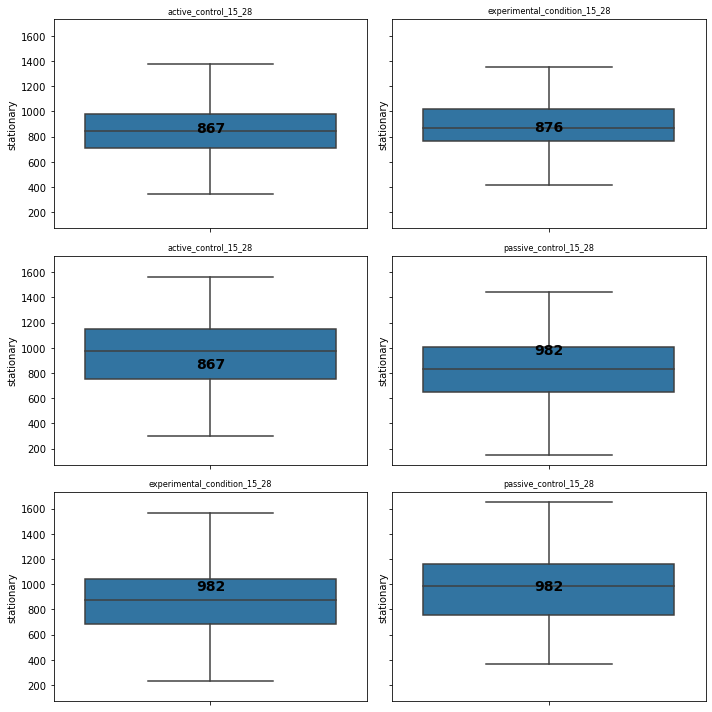

                                        Group  t-statistic   p-value
0   Active Control vs. Experimental Condition     1.267293  0.205567
1          Active Control vs. Passive Control    -4.350909  0.000016
2  Experimental Condition vs. Passive Control    -4.583888  0.000006


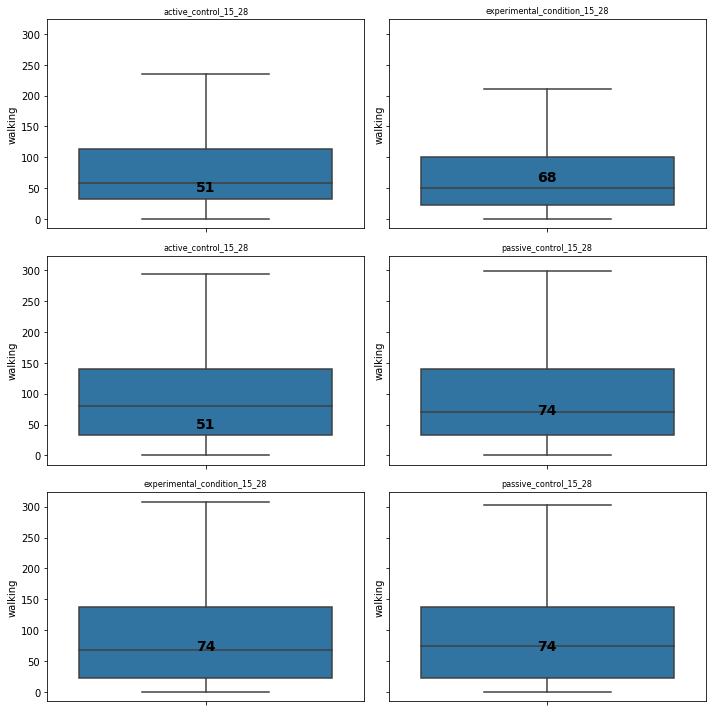

                                        Group  t-statistic   p-value
0   Active Control vs. Experimental Condition    -3.185035  0.001526
1          Active Control vs. Passive Control    -2.317050  0.020904
2  Experimental Condition vs. Passive Control     0.911031  0.362711


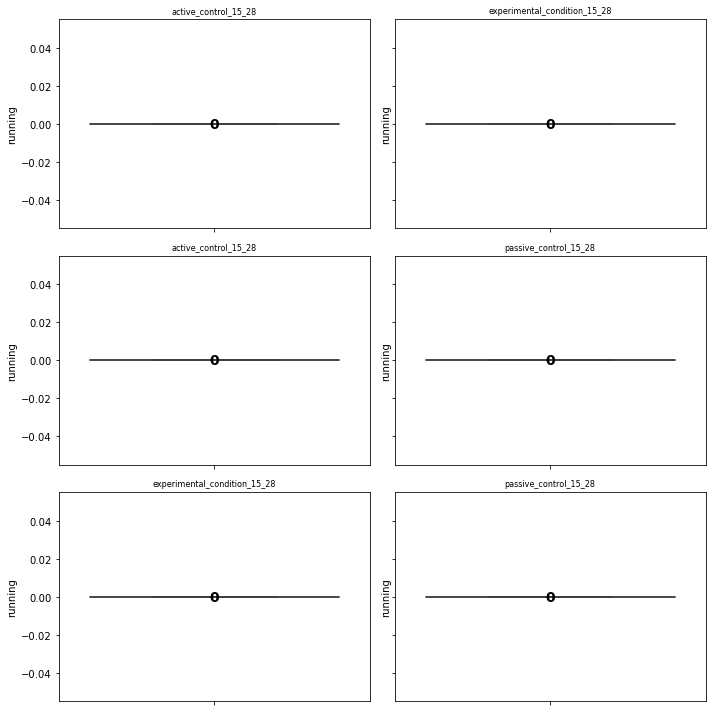

                                        Group  t-statistic   p-value
0   Active Control vs. Experimental Condition    -0.893082  0.372189
1          Active Control vs. Passive Control     1.030006  0.303505
2  Experimental Condition vs. Passive Control     1.051949  0.293322


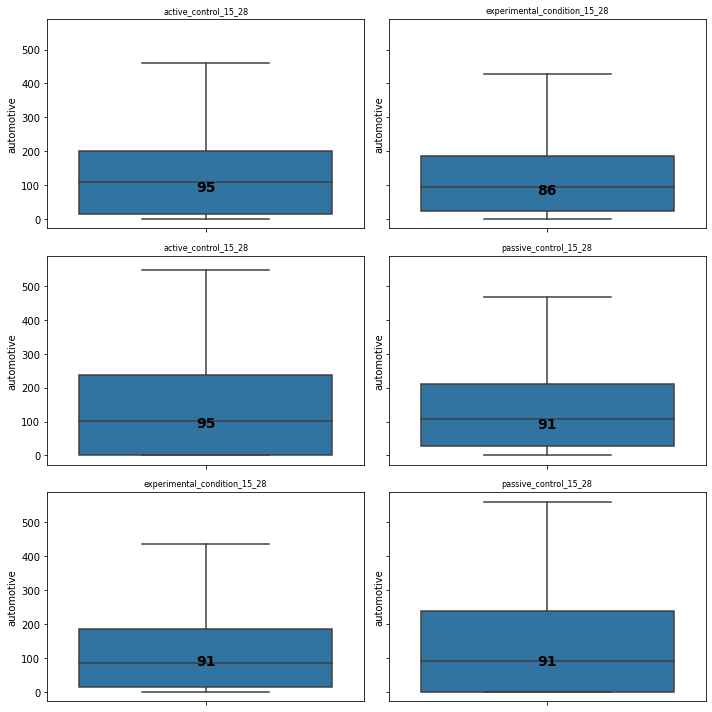

                                        Group  t-statistic   p-value
0   Active Control vs. Experimental Condition     0.682630  0.495118
1          Active Control vs. Passive Control    -1.412743  0.158353
2  Experimental Condition vs. Passive Control    -2.019219  0.043988


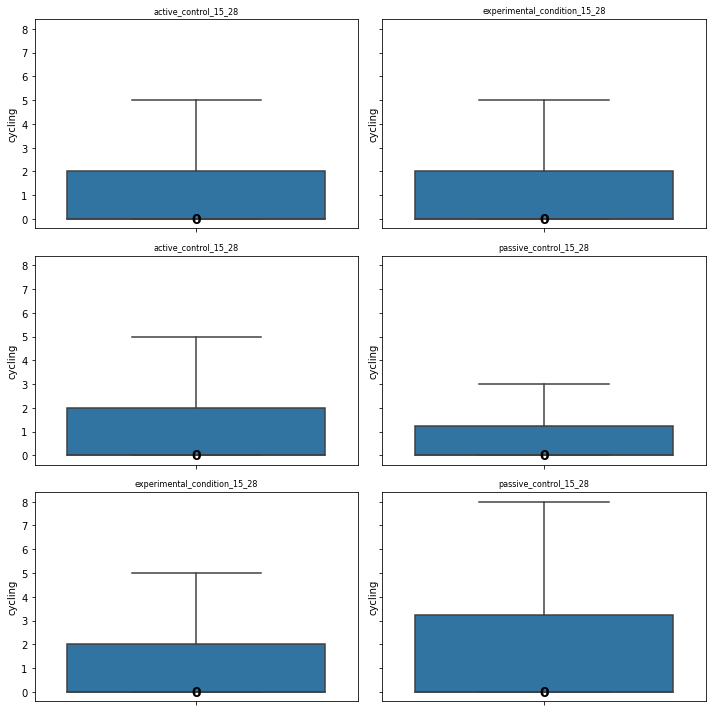

                                        Group  t-statistic   p-value
0   Active Control vs. Experimental Condition    -0.024919  0.980128
1          Active Control vs. Passive Control    -1.874920  0.061386
2  Experimental Condition vs. Passive Control    -2.173520  0.030201


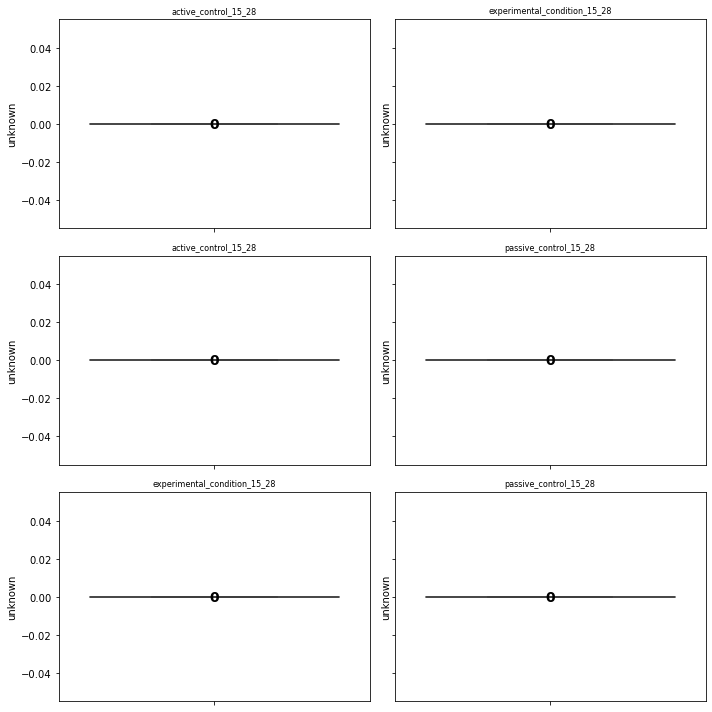

                                        Group  t-statistic  p-value
0   Active Control vs. Experimental Condition          NaN      NaN
1          Active Control vs. Passive Control          NaN      NaN
2  Experimental Condition vs. Passive Control          NaN      NaN


In [24]:
for clm in mylist:
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10), sharey=True)

    sns.boxplot(y=active_control_1_14[clm], orient="v", showfliers=False, ax=ax1)
    sns.boxplot(y=active_control_15_28[clm], orient="v", showfliers=False, ax=ax2)
    sns.boxplot(y=experimental_condition_1_14[clm], orient="v", showfliers=False, ax=ax4)
    sns.boxplot(y=experimental_condition_15_28[clm], orient="v", showfliers=False, ax=ax5)
    sns.boxplot(y=passive_control_1_14[clm], orient="v", showfliers=False, ax=ax3)
    sns.boxplot(y=passive_control_15_28[clm], orient="v", showfliers=False, ax=ax6)

    ax1.set_title("active_control_15_28", fontsize=8)
    m1 = int(active_control_15_28[clm].median())
    ax1.text(0, m1, m1, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})

    ax2.set_title("experimental_condition_15_28", fontsize=8)
    m2 = int(experimental_condition_15_28[clm].median())
    ax2.text(0, m2, m2, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})

    ax3.set_title("active_control_15_28", fontsize=8)
    m3 = int(active_control_15_28[clm].median())
    ax3.text(0, m3, m3, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})

    ax4.set_title("passive_control_15_28", fontsize=8)
    m4 = int(passive_control_15_28[clm].median())
    ax4.text(0, m4, m4, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    

    ax5.set_title("experimental_condition_15_28", fontsize=8)
    m5 = int(experimental_condition_15_28[clm].median())
    ax5.text(0, m4, m4, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    
        
    ax6.set_title("passive_control_15_28", fontsize=8)
    m6 = int(passive_control_15_28[clm].median())
    ax6.text(0, m6, m6, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})

    plt.tight_layout()
    plt.show()


    # perform t-tests and save results in variables
    t1, p1 = stats.ttest_ind(active_control_15_28[clm], experimental_condition_15_28[clm])
    t2, p2 = stats.ttest_ind(active_control_15_28[clm], passive_control_15_28[clm])
    t3, p3 = stats.ttest_ind(experimental_condition_15_28[clm], passive_control_15_28[clm])

    # create table with results
    data = {'Group': ['Active Control vs. Experimental Condition', 'Active Control vs. Passive Control', 'Experimental Condition vs. Passive Control'],
            't-statistic': [t1, t2, t3],
            'p-value': [p1, p2, p3]}
    results_table = pd.DataFrame(data)

    # display table
    print(results_table)
